## Lab 5 - PID control
Run this cell before running any other cells

In [18]:
%reload_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

ble = get_ble_controller()
ble.connect()

2025-02-12 17:34:29,254 | INFO     |: Already connected to a BLE device
2025-02-12 17:34:29,254 | INFO     |: Already connected to a BLE device


In [6]:
# Notification Handler
def notification_handler(uuid, byte_array):
    global time_list, dist, pid, pwm, p, i, d
    rx_string = ble.bytearray_to_string(byte_array)
#    print(rx_string)
    if rx_string.find(',') < 0:
        print(rx_string)
    else:
        time, a, b, c, kp, ki, kd = rx_string.split(',')
        time_sec = float(time[2:])/1000
        time_list.append(time_sec)
        dist.append(float(a[3:]))
        pid.append(float(b[3:]))
        pwm.append(float(c[3:]))
        p.append(float(kp[3:]))
        i.append(float(ki[3:]))
        d.append(float(kd[3:]))
        
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [7]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

T:24129


In [8]:
ble.send_command(CMD.SEND_THREE_FLOATS, "1234567890|9876543|0.034567")

In [9]:
ble.send_command(CMD.SEND_TWO_INTS, "2|-6")

In [10]:
# Ku = 0.15-0.2
# Pu = 0.4 sec
# 
# Kp = 0.6 * Ku = .12
# Ki = 2 * Kp / Pu = 0.6
# Kd = Kp * Pu / 8 = 0.006
ble.send_command(CMD.SET_PID_MAX, "0.3|0.0001|0.001|50|40")

KP:0.300 KI:0.000 KD:0.001 PID_MAX:50 DEADZONE:40


In [11]:
# Backward 2 seconds
ble.send_command(CMD.SET_PWM, "0|75|0|75|2000")

In [12]:
ble.send_command(CMD.GO_WALL, "")

KP:0.300 KI:0.000 KD:0.001 PID_MAX:50 DEADZONE:40
  Finished Go Wall


In [13]:
# Clear the data
time_list = []
dist = []
pid = []
pwm = []
p = []
i = []
d = []

# send the command
ble.send_command(CMD.GET_WALL_DATA, "")

  Sending PID data ...
  Data sent!


947


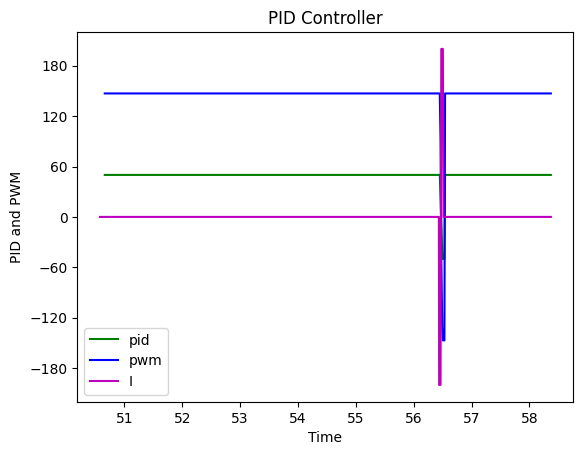

2025-02-12 17:32:10,372 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
2025-02-12 17:32:10,372 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E


In [14]:
plt.yticks([-180, -120, -60, 0, 60, 120, 180])
count = len(time_list)
print(count)
    
#for i in range(0, 30):
#    print(time_list[i], dist[i], pid[i], pwm[i])

total = count - 1

#plt.plot(time_list[:total], dist[:total], color='r', label='dist')
plt.plot(time_list[10:total],  pid[10:total], color='g', label='pid')
plt.plot(time_list[10:total],  pwm[10:total], color='b', label='pwm')
#plt.plot(time_list[:total],  p[:total],   color='c', label='P')
plt.plot(time_list[:total],  i[:total],  color='m', label='I')
#plt.plot(time_list[:total],  d[:total],  color='y', label='D')

plt.title('PID Controller')
plt.xlabel('Time')
plt.ylabel('PID and PWM')
plt.legend()
plt.show()

In [ ]:
# Forward 1 seconds. max speed, then brake hard
ble.send_command(CMD.SET_PWM, "100|0|100|0|1000")
ble.send_command(CMD.SET_PWM, "255|255|255|255|1000")

In [ ]:
# Right motor only
ble.send_command(CMD.SET_PWM, "0|0|50|0|2000")

In [ ]:
# Left motor only
ble.send_command(CMD.SET_PWM, "50|0|0|0|2000")

In [ ]:
# rotate CCW
ble.send_command(CMD.SET_PWM, "1|250|250|1|2000")

In [ ]:
# rotate CW
ble.send_command(CMD.SET_PWM, "250|1|1|250|2000")

In [ ]:
# Forward 2 seconds
ble.send_command(CMD.SET_PWM, "80|0|80|0|2000")

In [ ]:
# Backward 2 seconds
ble.send_command(CMD.SET_PWM, "0|75|0|75|2000")

In [ ]:
# stop
ble.send_command(CMD.SET_PWM, "0|0|0|0|0")

In [ ]:
# slowest forward
ble.send_command(CMD.SET_PWM, "40|00|40|00|2000")

In [ ]:
# slowest reverse
ble.send_command(CMD.SET_PWM, "00|80|00|80|2000")

In [ ]:
# slowest turn
ble.send_command(CMD.SET_PWM, "00|80|80|0|2000")

## Disconnect

In [16]:
# Disconnect
ble.disconnect()

2025-02-12 17:32:35,204 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
2025-02-12 17:32:35,204 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
